<a href="https://colab.research.google.com/github/thaohung13/AI_W9_31_3_2023/blob/main/AI_W9_31_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

In [52]:
train_images.shape

(60000, 28, 28)

In [53]:
train_labels.shape

(60000,)

In [54]:
test_images.shape

(10000, 28, 28)

In [55]:
test_labels.shape

(10000,)

In [56]:
digit=train_images[789]#hien thi du lieu ra

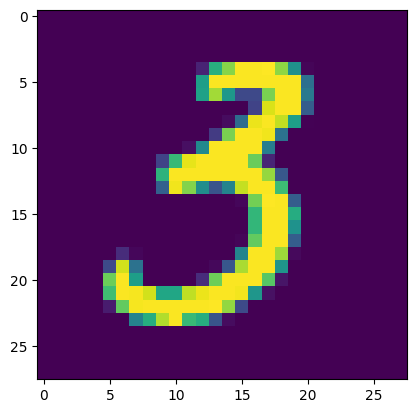

Số này là: 3


In [14]:
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show()
print('Số này là:',train_labels[789])

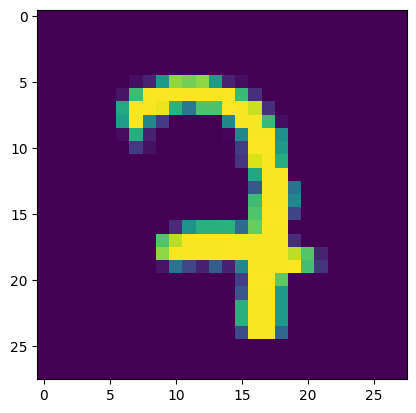

Số này là: 7


In [57]:
digits=train_images[26600]#de hien thi dang chu
plt.imshow(digits)
plt.show()
print('Số này là:',train_labels[26600])

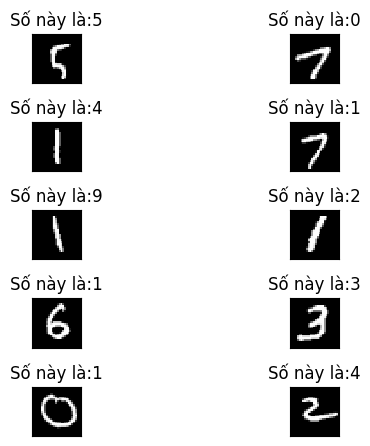

In [58]:
for i in range(10):
  plt.subplot(5,2,i+1)#
  plt.tight_layout()
  plt.imshow(train_images[i+100],cmap='gray',interpolation='None')
  plt.title('Số này là:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [59]:
#nhan dang anh 28x28
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))#them 1 lop 512 newral
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [60]:
train_images=train_images.reshape((60000,28*28))#chuyen 60000 anh thanh 28*28: anh gray gtri tu 0-255
train_images=train_images.astype('float32')/255 #chia de ve gtri 0/1
print(train_images.shape)

(60000, 784)


In [61]:
test_images=test_images.reshape((10000,28*28))#chuyen 60000 anh thanh 28*28: anh gray gtri tu 0-255
test_images=test_images.astype('float32')/255 #chia de ve gtri 0/1
print(test_images.shape)

(10000, 784)


In [62]:
from keras.utils import to_categorical#lenh chuyen 1 bit thanh nhieu bit
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


data->model->compile->train->test

In [63]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Bộ tối ưu (optimizer),Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(train_images,train_labels,epochs=20,batch_size=128) #epochs:so lan hoc, batch_size=128: boc ngau nhien 128 anh trong bo du lieu de hoc 
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2656 - accuracy: 0.9230
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1067 - accuracy: 0.9682
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0705 - accuracy: 0.9786
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0508 - accuracy: 0.9852
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0388 - accuracy: 0.9886
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0294 - accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0225 - accuracy: 0.9933
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0171 - accuracy: 0.9953
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0127 - accuracy: 0.9967
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0099 - accuracy: 0.9977

In [64]:
model.save('MINIST.h5')

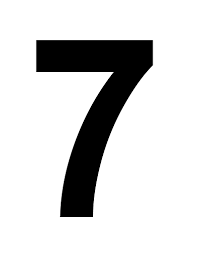

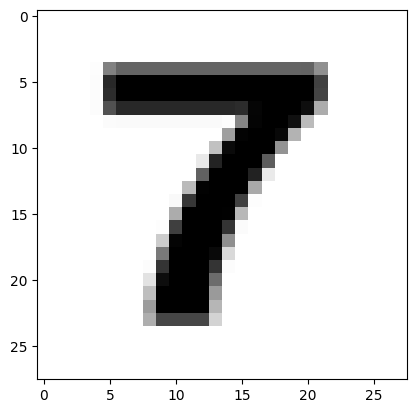

1/1 [==============================] - 0s 74ms/step
Predicted digit: 7


In [68]:
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display
#Load model
model = load_model('MINIST.h5')

#Open image uploaded 
img = Image.open('7.png')

#Display image uploaded
display(img)

#Convert to gray Image
img = img.convert('L')

#Resize to 28x28 image
img = img.resize((28,28))

#Show image
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()

#Convert image to numpy array
img = np.array(img)

#Reshape array to Vector(1, 28*28)
img = img.reshape(1,28*28)

#Rescale pixel value from (0, 255) to (0, 1)
img = img.astype('float32') / 255

#Prediction and displaying the result on the screen
predictions = model.predict(img)
digit = np.argmax(predictions)
print('Predicted digit:', digit)

In [69]:
x=test_images
y=test_labels

In [70]:
x_pred=x[1000].reshape(1,28*28)
x_pred=x_pred.astype('float32')/255
y_pred=model.predict(x_pred)
print(y_pred)

1/1 [==============================] - 0s 17ms/step
[[0.03641504 0.07895908 0.06018255 0.03271217 0.09663834 0.47365648
  0.0464702  0.07976254 0.04516856 0.05003501]]
